In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [224]:
df=pd.read_csv('/Users/y2z/Desktop/suicide.csv')
df.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [225]:
df.replace('A & N Islands (Ut)','A & N Islands',inplace=True)
df.replace('Delhi (Ut)','Delhi',inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'By Other means', inplace=True)
df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [226]:
df.Type_code.value_counts()

Causes                  30420
Means_adopted           18560
Professional_Profile    13492
Education_Status         1867
Social_Status            1160
Name: Type_code, dtype: int64

In [227]:
len(df[df['Total']==0])

41676

In [228]:
df.State.value_counts()

Andhra Pradesh       6791
Bihar                6790
Chhattisgarh         6790
Assam                6786
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
D & N Haveli         6704
Delhi                4792
Name: State, dtype: int64

In [229]:
df.shape

(65499, 7)

In [230]:
df.drop(df[df['Total']==0].index,inplace=True)

In [231]:
df.shape

(23823, 7)

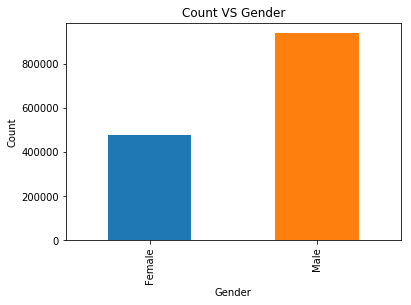

In [232]:
gender=df.groupby(['Gender']).agg('sum')['Total'].plot("bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count VS Gender")
plt.show()


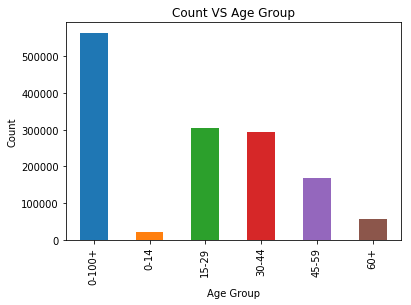

In [233]:
age_group=df.groupby(['Age_group']).sum()['Total'].plot("bar")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Count VS Age Group")
plt.show()



In [234]:
age_group

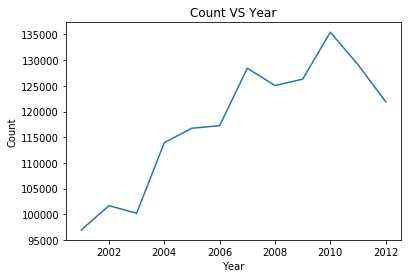

In [235]:
year=df.groupby(['Year']).sum()['Total'].plot('line')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count VS Year")
plt.show()



In [236]:
year

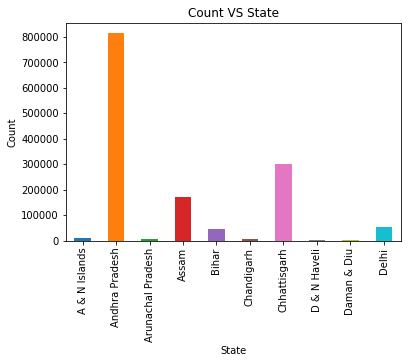

In [237]:
state=df.groupby(['State']).sum()['Total'].plot('bar')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count VS State")
plt.show()



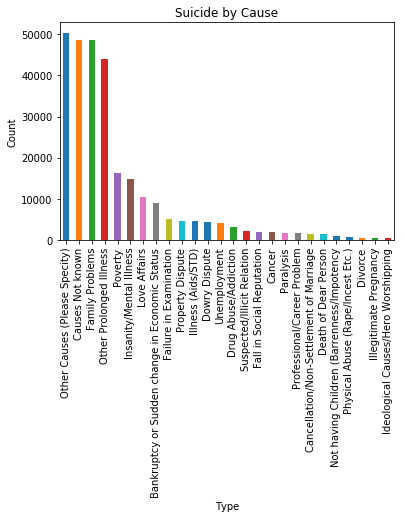

In [238]:
cause=df[df['Type_code']=='Causes']
cause=cause.groupby('Type').sum()['Total']
cause=cause.sort_values(ascending=False).plot('bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Suicide by Cause")
plt.show()

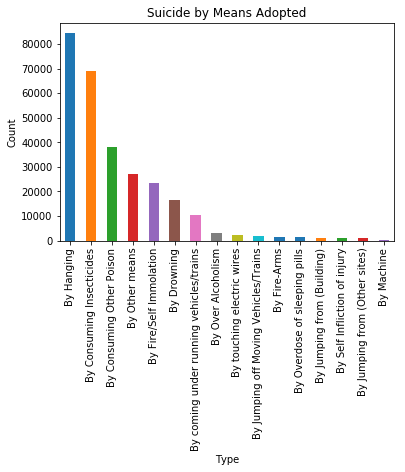

In [239]:
means_adopted=df[df['Type_code']=='Means_adopted']
means_adopted=means_adopted.groupby('Type').sum()['Total']
means_adopted=means_adopted.sort_values(ascending=False).plot('bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Suicide by Means Adopted")
plt.show()
    
    
    

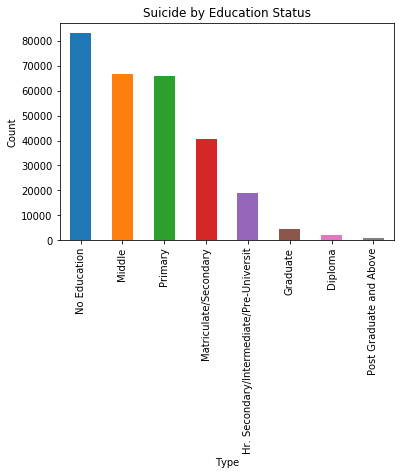

In [240]:
es=df[df['Type_code']=='Education_Status']
es=es.groupby('Type').sum()['Total']
es=es.sort_values(ascending=False).plot('bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Suicide by Education Status")
plt.show()

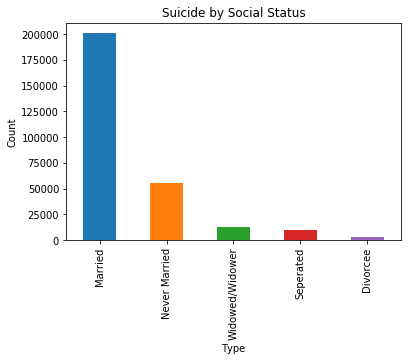

In [241]:
ss=df[df['Type_code']=='Social_Status']
ss=ss.groupby('Type').sum()['Total']
ss=ss.sort_values(ascending=False).plot('bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Suicide by Social Status")
plt.show()

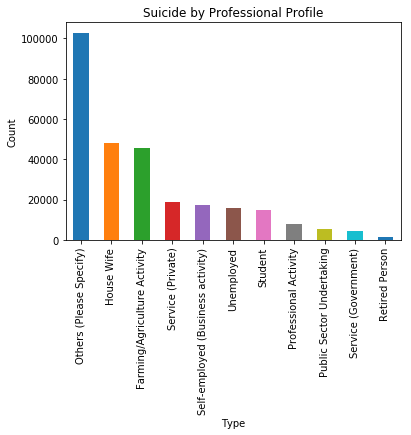

In [242]:
pp=df[df['Type_code']=='Professional_Profile']
pp=pp.groupby('Type').sum()['Total']
pp=pp.sort_values(ascending=False).plot('bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Suicide by Professional Profile")
plt.show()

In [248]:
def function(Type_code,x,y):
    x=df[df['Type_code']==y]
    x=x.groupby('Type').sum()['Total']
    x=x.sort_values(ascending=False).plot('bar')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.title("Suicide by "+ y)
    plt.show()

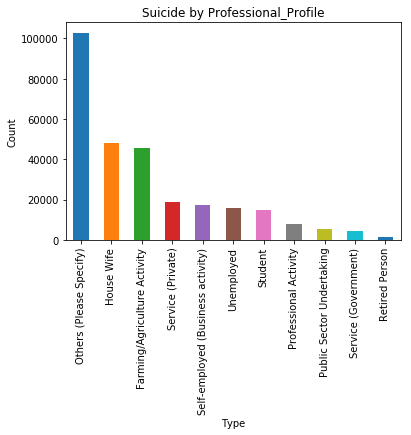

In [252]:
function(pp,'pp','Professional_Profile')

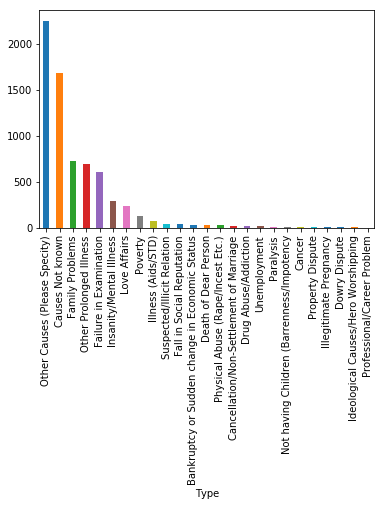

In [267]:
lower_age=df[df['Age_group']=='0-14']
lower_age_cause=lower_age[lower_age['Type_code']=='Causes']
lower_age_cause=lower_age_cause.groupby(['Type'])['Total'].sum()
lower_age_cause=lower_age_cause.sort_values(ascending=False).plot('bar')

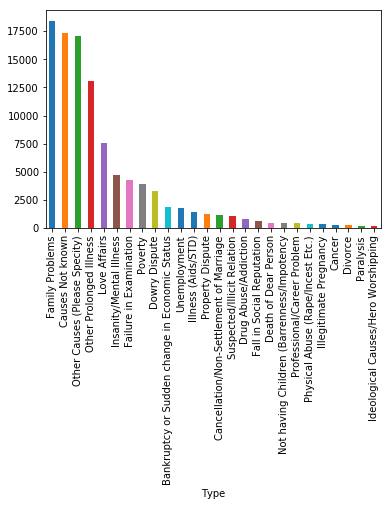

In [270]:
middle_age=df[df['Age_group']=='15-29']
middle_cause=middle_age[middle_age['Type_code']=='Causes']
middle_cause=middle_cause.groupby(['Type'])['Total'].sum()
middle_cause=middle_cause.sort_values(ascending=False).plot('bar')

In [ ]:
# Conclusion
# Age group between 15-44 has the highest number of suicides.
# Rate of suicide sky rocketed from 2002-2010 but since 2011 it has been decreasing but, since we have the data till 2012 we can't confim the pattern.
# Maharashtra, West Bengal and Tamil Nadu have the highest suicide rate this might also be because of the high population in these states.
# Family Problems, Illness, Mental Illness are some of the main reason while most of the reasons are still unknown.
# Hanging, Consuming Insecticides is more common but, most of other means are unknown.
# Most of the professional profile is unknown but house wife comes in second, while Farming comes in at third.
# Married is at the top when it comes to social status while never married is at second.
# The reason for suicide at the age group between 0-14 is because of Failure in Examination.
# The reason for suicide at the age group between 15-29 is because of Family Problems.